# Lab 1:

The main purpose of Lab 0 is to familiarize yourselves with the camera. You should be able to capture an image, establish a basic understanding of camera parameters and adjust them in live image display to obatin the best image possible

### Import basic Python modules 

In [1]:
# Required imports 
import sys
import os
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
# from instrumental.drivers.cameras import uc480
import scipy.io as sio

In [2]:
# Use when camera is unmounted and dataset is stored in the drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Camera object instantiation

In [ ]:
# initialize camera 
# lists the cameras that are detected. 
instruments = uc480.list_instruments()
# initiliaze the camera using the detected cameras.
cam = uc480.UC480_Camera(instruments[0])
# Open Camera. DONT FORGET TO CLOSE!
cam.open()

### Check camera properties, change Camera settings and grab an image. 

In [ ]:
# Connect to the camera and set up the image memory
cam.open()
# view current camera params. 
cam.get_parameters()

Exposure Time: 66.62091228070176ms
Exposure Time Range: [0.008982456140350877 66.62091228070176]
Framerate: 14.997947649269046Hz
Pixel Clock: 24MHz
Gain: 1.0


#### Set Framerate

In [ ]:
# set frame rate
cam.set_framerate(framerate = "7Hz")
# get exposure range, you can see that the frame rate will change the maximum exposure time. 
print(cam._get_exposure_range())
# print current frame rate
print(cam.framerate)

(<Quantity(0.00898245614, 'millisecond')>, <Quantity(142.790456, 'millisecond')>)
7.000578714507065 hertz


#### Set Exposure Time 

In [ ]:
# get exposure range
cam._get_exposure_range()
"""
(0.008982456140350877 <Unit('millisecond')>,
 142.79045614035087 <Unit('millisecond')>)
"""

# set cam exposure (ms) 
cam._set_exposure('120 ms')
cam._get_exposure()


119.99981718398561 <Unit('millisecond')>

#### Setting Pixel Clock

In [ ]:
# Set pixelclock (Use the default)
cam.set_pixelclock(pixel_clock='7MHz')

# show the current pixel clock. 
cam.pixelclock

7 <Unit('megahertz')>

#### Setting Gain 

In [ ]:
# The master gain factor; 1.0 is the lowest gain, max gain is 4.0
# Use the default gain. 
cam._set_gain(30)

# get max gain 
cam.max_master_gain

# get current gain. 
cam.master_gain

1.92

In [ ]:
cam.get_parameters()

Exposure Time: 410.35267486080465ms
Exposure Time Range: [0.008982456140350877 488.26301754385963]
Framerate: 2.0472896614601814Hz
Pixel Clock: 7MHz
Gain: 1.92


In [ ]:
print(cam._width)

1280


In [ ]:
print(cam._height)

1024


In [ ]:
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 
width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()


(0, 0, 1280, 1024)

#### Take an image

In [ ]:
## Part 1
# Taking the average of 50 frames image and the variance image
img_total = 0
avg = np.zeros((50,1024,1280))
for i in range(50):
    # set cam exposure (ms) 
    cam._set_exposure('120 ms')
    cam._get_exposure()
    #take an image
    img = cam.grab_image().copy()
    avg[i,:,:] = img

# average = np.mean(avg, axis = 0)
# variance = np.var(avg, axis = 0)

In [ ]:
float_img = avg.astype('float')
average = np.mean(float_img, axis = 0)
variance = np.var(float_img, axis = 0)

In [ ]:
# Save Full-field frame-averaged offset image and noise image as .mat file
sio.savemat("50framesMean_part1.mat", {"average":average})
sio.savemat("50framesVariance_part1.mat", {"variance":variance})

In [ ]:
# Check images are saved by loadmat()
average = sio.loadmat("50framesMean_part1.mat")
variance =  sio.loadmat("50framesVariance_part1.mat")

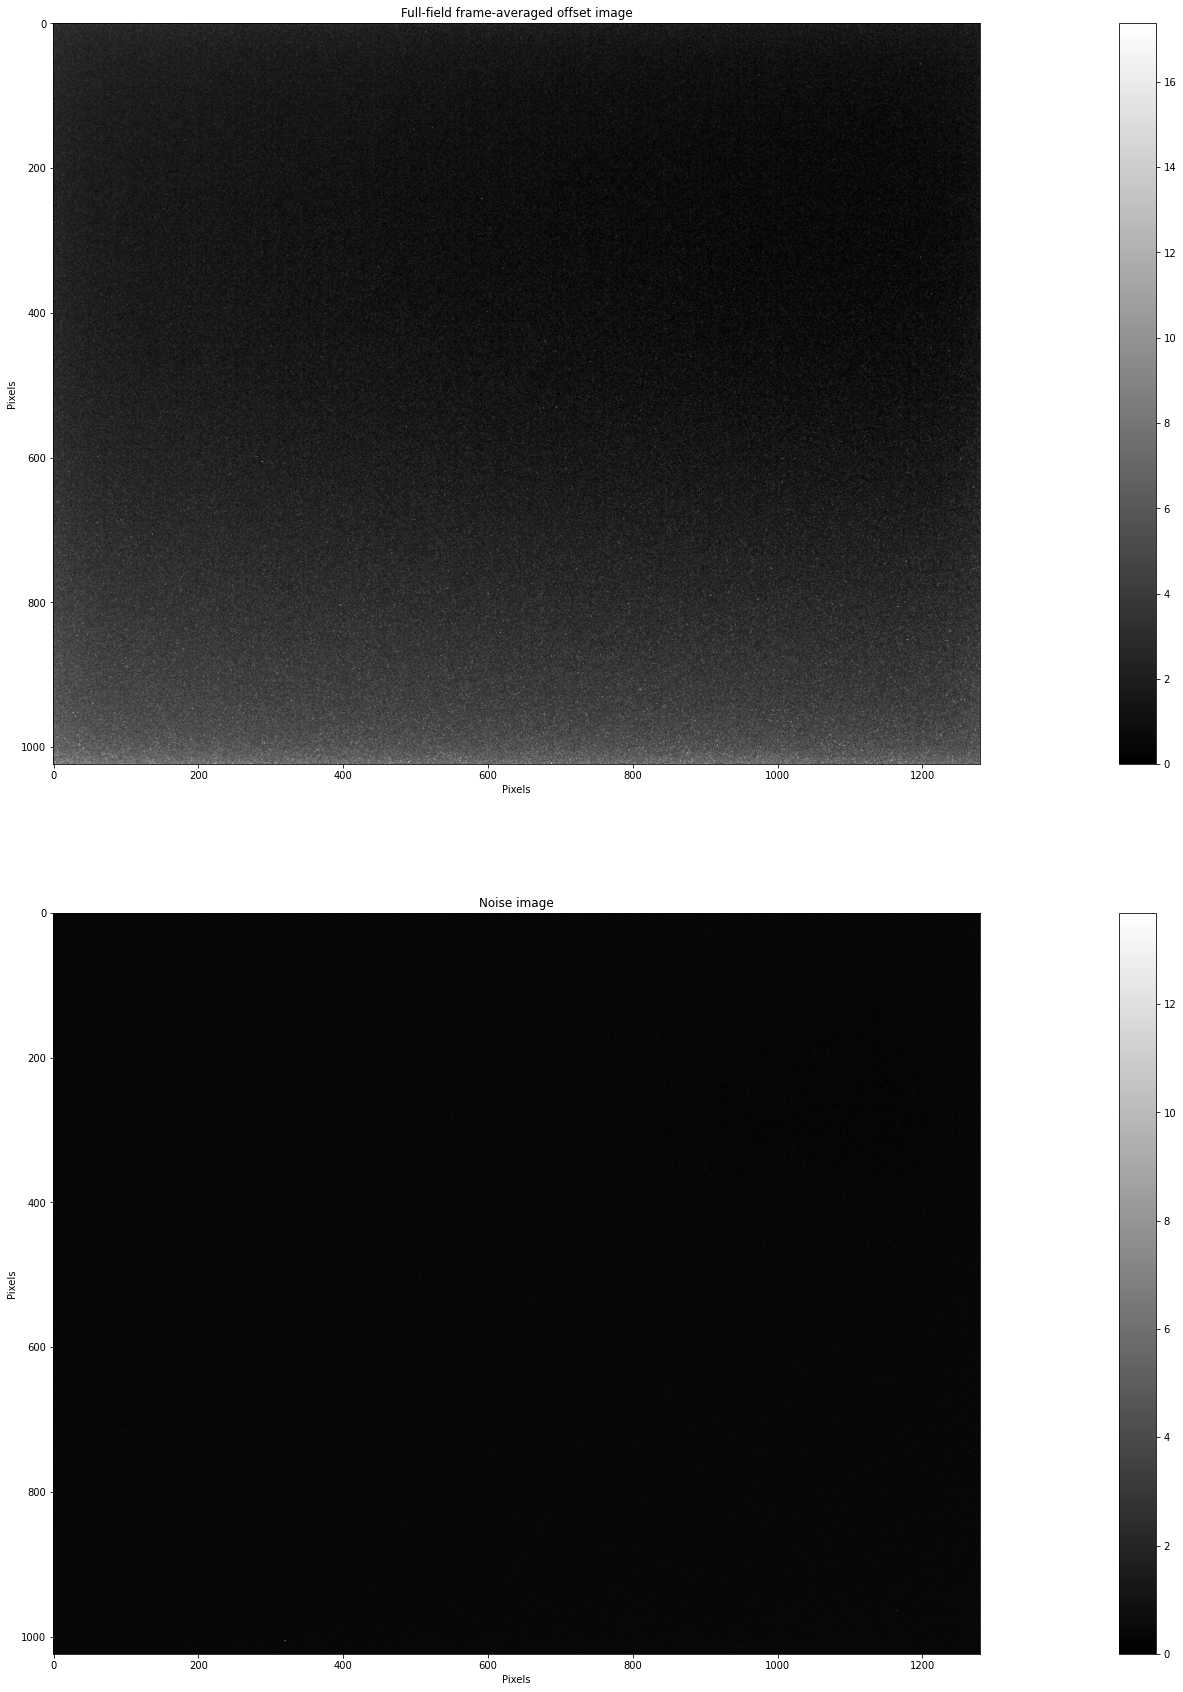

In [ ]:
## Part 1
# Plot full-field frame-averaged offset image and noise image with colorbar
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(30)

f.add_subplot(2,1,1)
ax1 = plt.subplot(2,1,1)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(average, cmap = 'gray')
plt.title('Full-field frame-averaged offset image')
plt.colorbar()

f.add_subplot(2,1,2)
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel("Pixels")
ax2.set_ylabel("Pixels")
plt.imshow(variance, cmap = 'gray')
plt.title('Noise image')
plt.colorbar()

# Save two images as .png
f.savefig("50FramesAvgVar.png")


#### Set Image ROI

You don't always have to capture the full-field image, feel free to narow down to a specific ROI and focus on your target of interest

**Attention**: Set the image ROI based on coordinates. This sets the starting point (x_0, y_0) of the rectangular ROI. Then you set the width (X-direction Left to Right) and height of the rectangle (Y-direction top to bottom).

In [ ]:
# get size of max image. 
cam.open()
cam._get_max_img_size() # Width, Height

(1280, 1024)

In [ ]:
# set the image ROI based on coordinates. 
# This sets the starting point of the rectangle in the X-direction west to east. and Y-direction north to south
x0, y0 = 600, 0
# this sets the width and height of the rectangle. 
width, height = 100, 100
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

(600, 0, 100, 100)

In [ ]:
## Part 1
# 100 frames at 15 exposures
x = np.zeros((17, 100,100,100))

exp = [10, 15, 20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
j = 0
for val in exp:
    print("Current exp:", val)
    for i in range(100):
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        x[j,i,:,:] = img
    j += 1


Current exp: 10
Current exp: 15
Current exp: 20
Current exp: 35
Current exp: 40
Current exp: 50
Current exp: 60
Current exp: 75
Current exp: 80
Current exp: 90
Current exp: 100
Current exp: 110
Current exp: 115
Current exp: 120
Current exp: 125
Current exp: 130
Current exp: 140


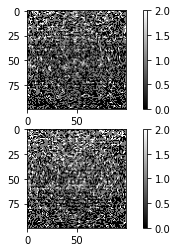

In [ ]:
## Part 1
# For randomly picking two frames with varied exposure from exposure list
x = x.astype('float')
f = plt.figure()
f.add_subplot(2,1,1)
ax1 = plt.subplot(2,1,1)
plt.imshow(x[0,0,:,:], cmap = 'gray')
plt.colorbar()
f.add_subplot(2,1,2)
plt.imshow(x[0,49,:,:], cmap = 'gray')
plt.colorbar()

In [ ]:
sio.savemat("100frames15exp_part1.mat", {"images":x})

In [26]:
x = sio.loadmat("/content/drive/MyDrive/Imaging Instrumentation Dataset/100frames15exp_part1.mat")["images"]
x = x.astype("float")

In [29]:
## Part 1
# Graph of exposure time vs mean offest value in AOIs
offset = np.zeros((17,100,100))
for i in range(17):
    offset[i,:,:] = np.mean(x[i,:,:,:],axis = 0) 

offset_vals = np.zeros((17,1))
for j in range(17):
    offset_vals[j] = np.mean(offset[j,:,:])

#Either just do it about axis 2 since it's a square, or do np.mean twice over axis 1 and 2, 
# or fo np.mean over axis 1 (--> (17,100) matrix of avg column values) then divide by 100
# I don't think averaging over columns will work for variance and stdev

# offset_vals = np.zeros((17,1))
# for i in range(17):
#   xx = x[i,:,:,:]
#   xx_offset_by_frames = np.mean(xx,axis = 0)
#   offset_vals[i] = np.mean(xx_offset_by_frames,axis=(0,1))

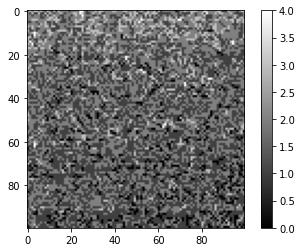

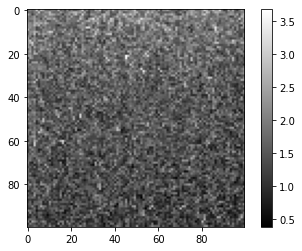

In [31]:
plt.imshow(x[6,49,:,:], cmap = 'gray')
plt.colorbar()
plt.figure()
plt.imshow(offset[6,:,:], cmap = 'gray')
plt.colorbar()

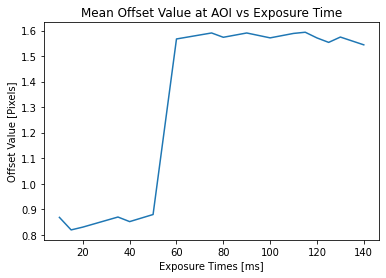

In [ ]:
## Part 1
exp = [10, 15, 20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
plt.plot(exp, offset_vals)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Offset Value [Pixels]")
plt.title("Mean Offset Value at AOI vs Exposure Time")
plt.savefig("MeanOffsetVsExposure_part1.png")


In [32]:
## Part 1
# Graph of exposure time vs variance value in AOIs
variance = np.zeros((17,100,100))
for i in range(17):
    variance[i,:,:] = np.mean(x[i,:,:,:],axis = 0)  

variance_vals = np.zeros((17,1))
for j in range(17):
    variance_vals[j] = np.var(variance[j,:,:])


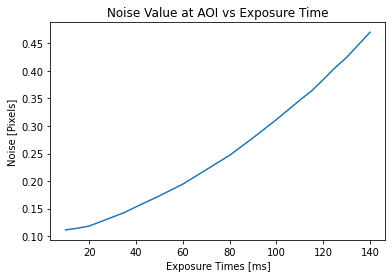

In [ ]:
plt.plot(exp, variance_vals)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Noise [Pixels]")
plt.title("Noise Value at AOI vs Exposure Time")
plt.savefig("NoiseVarianceVsExposure_part1.png")

### Take some images and vary exposure time and ROI to get a sense of the camera. 

In [ ]:
## Part 2
# Full-field mean and variance images with good exposure
# This sets the starting point of the rectangle in the X-direction west to east. and Y-direction north to south
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 
width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

# Aperature: 6 
# Focus: 0.37 m
# Exposure: 120 ms

(0, 0, 1280, 1024)

In [ ]:
## Part 2
img_total = 0
avg2 = np.zeros((50,1024,1280))
for i in range(50):
    # set cam exposure (ms) 
    cam._set_exposure('120 ms')
    cam._get_exposure()
    #take an image
    img = cam.grab_image().copy()
    avg2[i,:,:] = img
    
avg2 = avg2.astype('float')
average2 = np.mean(avg2, axis = 0)
variance2 = np.var(avg2, axis = 0)

In [ ]:
sio.savemat("50framesMean_part2.mat", {"average2":average2})
sio.savemat("50framesVariance_part2.mat", {"variance2":variance2})

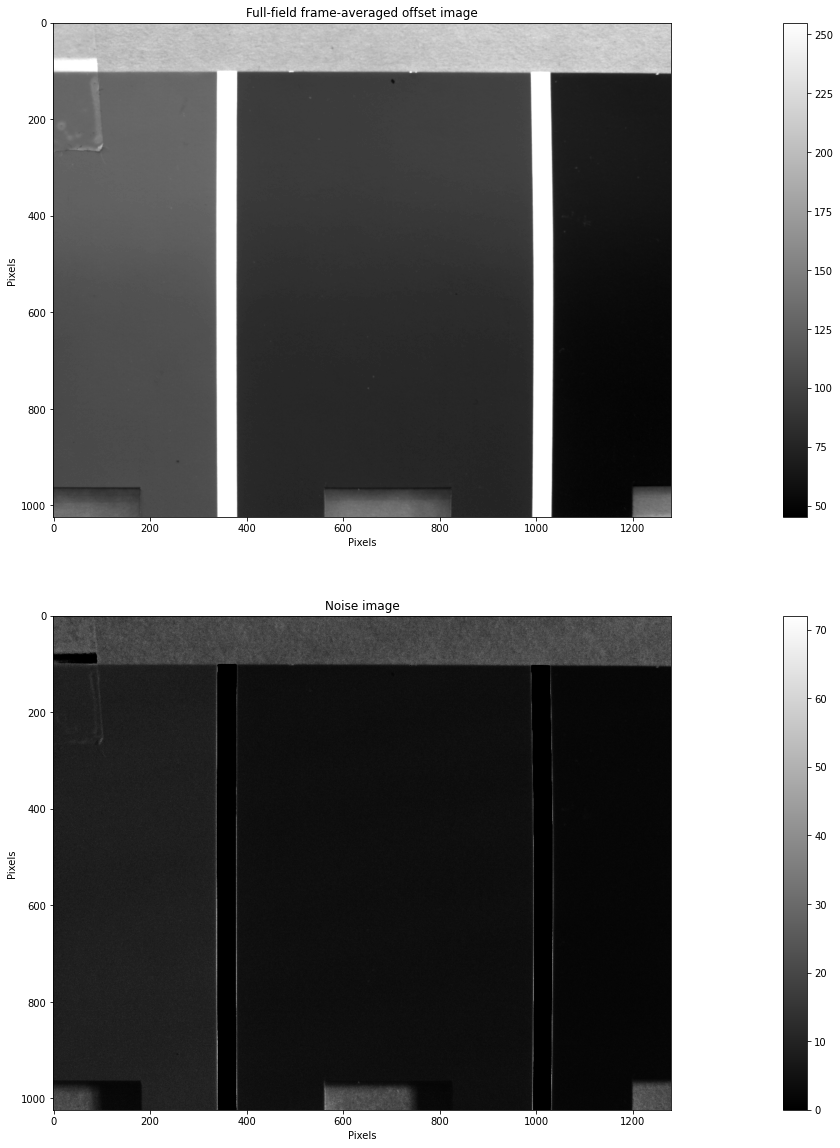

In [ ]:
## Part 2
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)

f.add_subplot(2,1,1)
ax1 = plt.subplot(2,1,1)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(average2, cmap = 'gray')
plt.title('Full-field frame-averaged offset image')
plt.colorbar()


f.add_subplot(2,1,2)
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel("Pixels")
ax2.set_ylabel("Pixels")
plt.imshow(variance2, cmap = 'gray')
plt.title('Noise image')
plt.colorbar()

f.savefig("50FramesAvgVar_part2.png")

In [ ]:
## Full-field image and cropped to 3 AOIs
x0, y0 = 0,0
width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

full_images_x = np.zeros((15,100,100,100))
full_images_x2 = np.zeros((15,100,100,100))
full_images_x3 = np.zeros((15,100,100,100))
exp = [20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
j = 0
for val in exp: 
    
    for i in range(100):
        print(val,i)
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        
        full_images_x[j,i,:,:] = img[200:300, 200:300]
        full_images_x2[j,i,:,:] = img[200:300, 450:550] 
        full_images_x3[j,i,:,:] = img[200:300, 1100:1200] 
    j += 1
    
sio.savemat("ThreeAOIs100Frames_part2_second_time_try.mat", {"lightest_gray":full_images_x, "middle_gray":full_images_x2,"darkest_gray":full_images_x3})

In [3]:
part2_images = sio.loadmat("/content/drive/MyDrive/Imaging Instrumentation Dataset/ThreeAOIs100Frames_part2_second_time_try.mat")

In [4]:
full_images_x = part2_images["lightest_gray"]
full_images_x2 = part2_images["middle_gray"]
full_images_x3 = part2_images["darkest_gray"]
x = full_images_x.astype('float')
x2 = full_images_x2.astype('float')
x3 = full_images_x3.astype('float')

<ipython-input-5-701dbe99b23b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(3,1,1)
<ipython-input-5-701dbe99b23b>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(3,1,2)
<ipython-input-5-701dbe99b23b>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be create

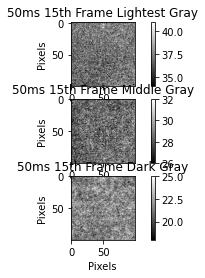

In [5]:
f = plt.figure()

f.add_subplot(3,1,1)
ax1 = plt.subplot(3,1,1)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(x[3,50,:,:], cmap = 'gray')
plt.title('50ms 15th Frame Lightest Gray')
plt.colorbar()

f.add_subplot(3,1,2)
ax1 = plt.subplot(3,1,2)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(x2[3,50,:,:], cmap = 'gray')
plt.title('50ms 15th Frame Middle Gray')
plt.colorbar()

f.add_subplot(3,1,3)
ax1 = plt.subplot(3,1,3)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(x3[3,50,:,:], cmap = 'gray')
plt.title('50ms 15th Frame Dark Gray')
plt.colorbar()


In [6]:
## Part 2
# Graph of exposure time vs mean offest value in AOI: Three grays
exp = [20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
# Lightest gray
offset1 = np.zeros((15,100,100))
for i in range(15):
    offset1[i,:,:] = np.mean(x[i,:,:,:],axis = 0)  
offset1_vals = np.zeros((15,1))
for j in range(15):
    offset1_vals[j] = np.mean(offset1[j,:,:])


# Middle gray
offset2 = np.zeros((15,100,100))
for i in range(15):
    offset2[i,:,:] = np.mean(x2[i,:,:,:],axis = 0)  
offset2_vals = np.zeros((15,1))
for j in range(15):
    offset2_vals[j] = np.mean(offset2[j,:,:])


# Darkest gray
offset3 = np.zeros((15,100,100))
for i in range(15):
    offset3[i,:,:] = np.mean(x3[i,:,:,:],axis = 0)  
offset3_vals = np.zeros((15,1))
for j in range(15):
    offset3_vals[j] = np.mean(offset3[j,:,:])

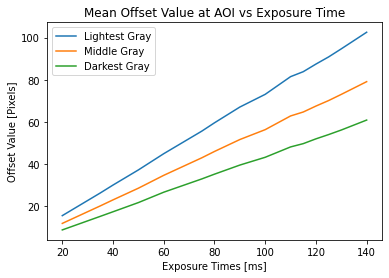

In [7]:
plt.plot(exp, offset1_vals, label = "Lightest Gray") 
plt.plot(exp, offset2_vals, label = "Middle Gray") 
plt.plot(exp, offset3_vals, label = "Darkest Gray")
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Offset Value [Pixels]")
plt.title("Mean Offset Value at AOI vs Exposure Time")
plt.legend()
plt.savefig("MeanOffsetVsExposure_part2.png")

In [8]:
## Part 2
# Graph of exposure time vs. noise/ variance value in AOI: three grays
# More photons, more light noise.

# Lightest gray
variance = np.zeros((15,100,100))
variance_vals = np.zeros((15,1))
for i in range(15):
    variance_vals[i] = np.var(offset1[i,:,:])


# Middle Gray
variance2 = np.zeros((15,100,100))
variance2_vals = np.zeros((15,1))
for i in range(15):
    variance2_vals[i] = np.var(offset2[i,:,:])


# Darkest Gray
variance3 = np.zeros((15,100,100))
variance3_vals = np.zeros((15,1))
for i in range(15):
    variance3_vals[i] = np.var(offset3[i,:,:])

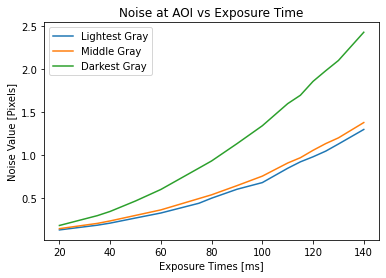

In [9]:
plt.plot(exp, variance_vals, label = "Lightest Gray") 
plt.plot(exp, variance2_vals, label = "Middle Gray") 
plt.plot(exp, variance3_vals, label = "Darkest Gray")
plt.legend()
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Noise Value [Pixels]")
plt.title("Noise at AOI vs Exposure Time")
plt.savefig("NoiseVarianceVsExposure_part2.png")

## We initially thought the problem came from our dataset. So we recollect data by reperforming the part 2 experiement.
## with the same calculation method. But different experiemnt produces similar result. We also thought about the differences 
## came from the variance calculation, so we tried hard code the variance method. It did not affect the result. 
## Based on the specified several frames drawn from the colloected data, we could see that the darker gray has more uniform result compared to the lightest gray.

In [10]:
## Part 2
#SNR graph
# Lightest Gray
stdev = np.zeros((15,100,100))
for i in range(15):
    stdev[i,:,:] = np.mean(x[i,:,:,:],axis = 0)
stdev_vals = np.zeros((15,1))
for j in range(15):
    stdev_vals[j] = np.std(stdev[j,:,:])

snr = np.zeros((15,1))
for k in range(15):
    val = offset1_vals[k] / stdev_vals[k]
    snr[k] = val

# Middle Gray
stdev2 = np.zeros((15,100,100))
for i in range(15):
    stdev2[i,:,:] = np.mean(x2[i,:,:,:],axis = 0)
stdev2_vals = np.zeros((15,1))
for j in range(15):
    stdev2_vals[j] = np.std(stdev2[j,:,:])

snr2 = np.zeros((15,1))
for k in range(15):
    val = offset2_vals[k] / stdev2_vals[k]
    snr2[k] = val
    
# Darkest Gray
stdev3 = np.zeros((15,100,100))
for i in range(15):
    stdev3[i,:,:] = np.mean(x3[i,:,:,:],axis = 0) 
stdev3_vals = np.zeros((15,1))
for j in range(15):
    stdev3_vals[j] = np.std(stdev3[j,:,:])

snr3 = np.zeros((15,1))
for k in range(15):
    val = offset3_vals[k] / stdev3_vals[k]
    snr3[k] = val

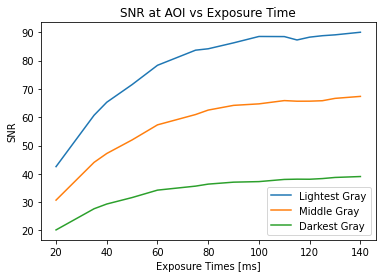

In [11]:
plt.plot(exp, snr, label = "Lightest Gray")
plt.plot(exp, snr2, label = "Middle Gray")
plt.plot(exp, snr3, label = "Darkest Gray")
plt.xlabel("Exposure Times [ms]")
plt.ylabel("SNR")
plt.title("SNR at AOI vs Exposure Time")
plt.legend()
plt.savefig("SNRVsExposure_part2.png")

In [ ]:
# Part 3: auto-exposure
# Take 20 frames at various exposures over exposure range
# print(cam._get_exposure_range())
# Gives min and max, decide on step based on size of range/15
exposure = list(range(10, 140, 10))
x4 = np.zeros((len(exposure),20,1024,1280))
j = 0
for val in exposure:
    for i in range(20):
        print(val, i)
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        x4[j,i,:,:] = img
    j += 1
sio.savemat("AutoExposureImageData_Part3", {"Images": x4})


In [5]:
x4 = sio.loadmat("/content/drive/MyDrive/Imaging Instrumentation Dataset/AutoExposureImageData_Part3")["Images"]

In [17]:
# Calculate SNR for each exposure (mean and standard deviation), put in a list (same method as above, but fixed)
x4 = x4.astype("float")
exposure = list(range(10, 140, 10))
offset4 = np.zeros((len(exposure),1024,1280))
offset4_vals = np.zeros((len(exposure),1))
stdev4_vals = np.zeros((len(exposure),1))
snr4 = np.zeros((len(exposure)))

for i in range(len(exposure)):
    offset4[i,:,:] = np.mean(x4[i,:,:,:],axis = 0)
    offset4_vals[i] = np.mean(offset4[i,:,:])


for j in range(len(exposure)):
    stdev4_vals[j] = np.std(offset4[j,:,:])


for k in range(len(exposure)):
    val = offset4_vals[k] / stdev4_vals[k]
    snr4[k] = val
    
print("SNR Lists:", snr4)
# If new SNR < old SNR, set exposure to that assoicated with old SNR;
# Also pick set of middle exposure values (cut out extremes we know won't work)

# Find max value in that list, then its location, then set exposure to value in list at same location
best = max(snr4)
print(best)
# loc_exp = snr.index(max)
# auto_exp = exposure[loc_exp]

# cam._set_exposure(auto_exp)
# cam._get_exposure()

SNR Lists: [1.73741299 1.63088075 1.60564952 1.59488963 1.59297964 1.60679859
 1.65010347 1.7300621  1.79520242 1.96879868 2.07656575 2.16939508
 2.31929688]
2.3192968757110974


Text(0, 0.5, 'Pixels')

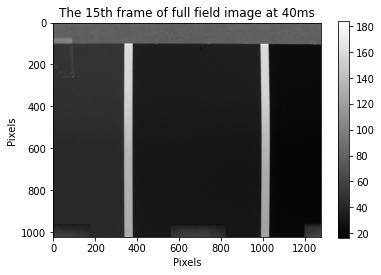

In [24]:
plt.imshow(x4[3,15,:,:], cmap = 'gray')
plt.colorbar()
plt.title("The 15th frame of full field image at 40ms")
plt.xlabel("Pixels")
plt.ylabel("Pixels")

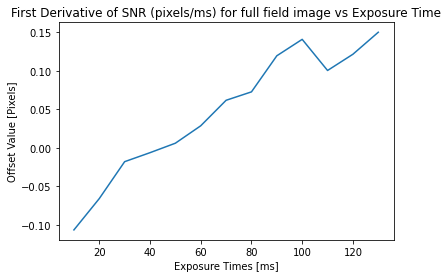

In [22]:
plt.plot(exposure, np.gradient(snr4))
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Offset Value [Pixels]")
plt.title("First Derivative of SNR (pixels/ms) for full field image vs Exposure Time")
plt.savefig("Derivative_MeanOffsetVsExposure_part1.png")


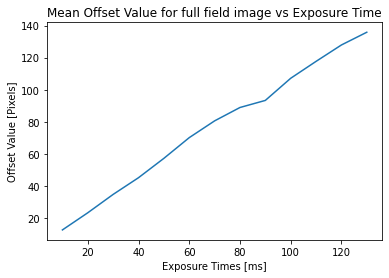

In [8]:
plt.plot(exposure, offset4_vals)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Offset Value [Pixels]")
plt.title("Mean Offset Value for full field image vs Exposure Time")
plt.savefig("MeanOffsetVsExposure_part1.png")

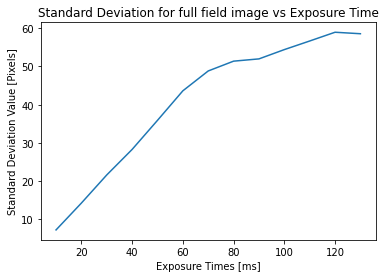

In [9]:
plt.plot(exposure, stdev4_vals)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Standard Deviation Value [Pixels]")
plt.title("Standard Deviation for full field image vs Exposure Time")
plt.savefig("Standard DeviationVsExposure_part1.png")

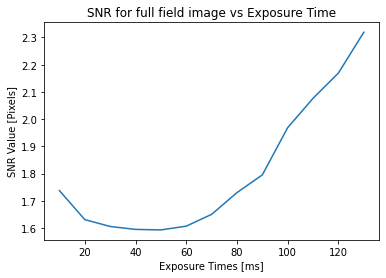

In [7]:
plt.plot(exposure, snr4)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("SNR Value [Pixels]")
plt.title("SNR for full field image vs Exposure Time")
plt.savefig("SNRVsExposure_part1.png")

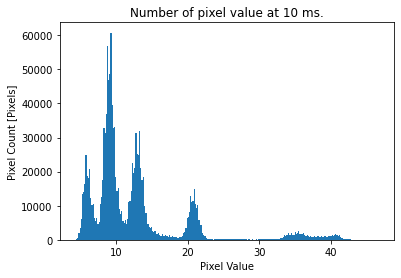

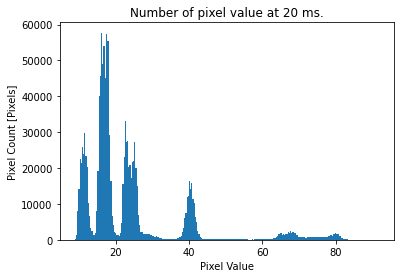

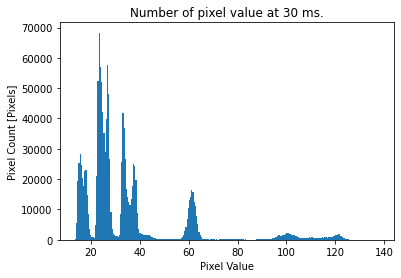

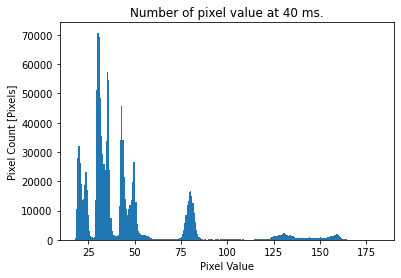

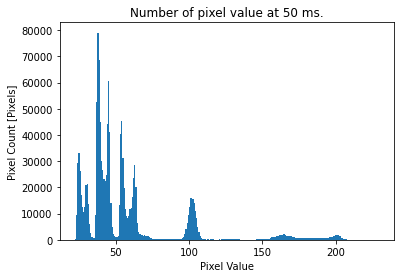

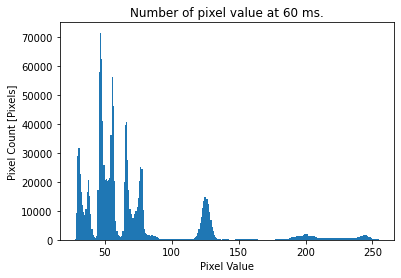

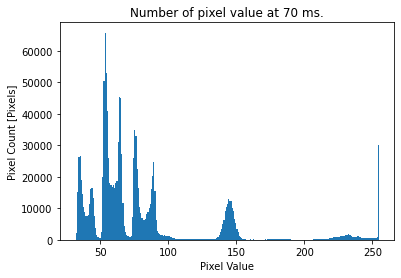

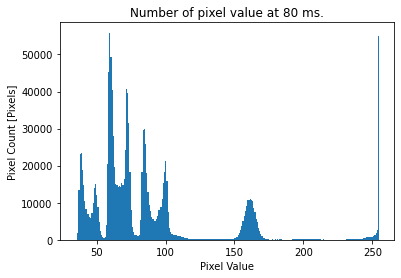

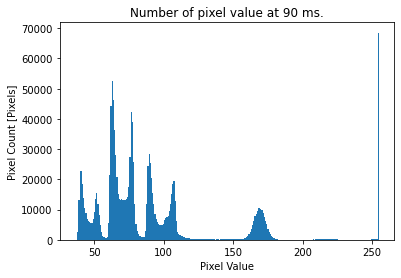

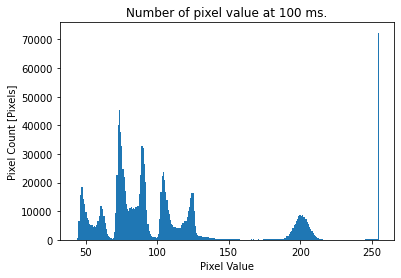

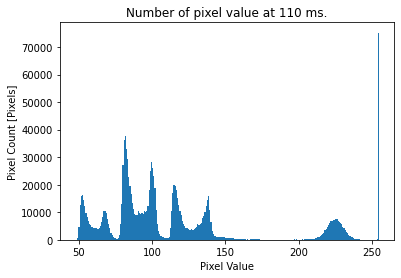

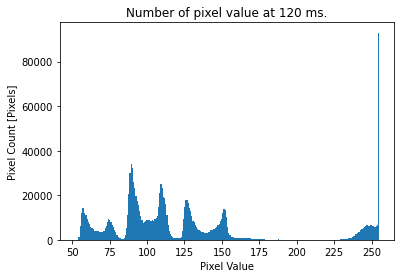

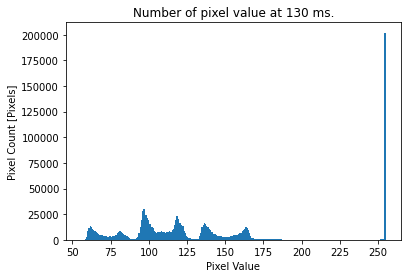

In [25]:
for i in range(len(exposure)):
  plt.figure()
  image1 = offset4[i,:,:]
  plt.hist(image1.flatten(),bins=256)
  plt.xlabel("Pixel Value")
  plt.ylabel("Pixel Count [Pixels]")
  plt.title("Number of pixel value at "+ str(exposure[i]) + " ms.")

In [ ]:
## Part 3 Trial 2

In [3]:
x4 = sio.loadmat("/content/drive/MyDrive/Imaging Instrumentation Dataset/AutoExposureImageData_Part3_Third")["Images"]

In [4]:
# Calculate SNR for each exposure (mean and standard deviation), put in a list (same method as above, but fixed)
x4 = x4.astype("float")
frames = 20
max_expo = 195
exposure = list(range(10, max_expo, 10))
print(list(exposure))
offset4 = np.zeros((len(exposure),128*6,128*8))
offset4_vals = np.zeros((len(exposure),1))
stdev4_vals = np.zeros((len(exposure),1))
snr4 = np.zeros((len(exposure)))

for i in range(len(exposure)):
    offset4[i,:,:] = np.mean(x4[i,:,:,:],axis = 0)
    offset4_vals[i] = np.mean(offset4[i,:,:])
#     stdev4_vals[i] = np.std(offset4[i,:,:])
#     val = offset4_vals[i] / stdev4_vals[i]
#     snr4[i] = val
#     print()

for j in range(len(exposure)):
    stdev4_vals[j] = np.std(offset4[j,:,:])


for k in range(len(exposure)):
    val = offset4_vals[k] / stdev4_vals[k]
    snr4[k] = val
    
print("SNR Lists:", snr4)
# If new SNR < old SNR, set exposure to that assoicated with old SNR;
# Also pick set of middle exposure values (cut out extremes we know won't work)

# Find max value in that list, then its location, then set exposure to value in list at same location
best = max(snr4)
print(best)
# loc_exp = snr.index(max)
# auto_exp = exposure[loc_exp]

# cam._set_exposure(auto_exp)
# cam._get_exposure()

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
SNR Lists: [1.87279709 1.85707604 1.79324743 1.73859333 1.70340803 1.78072608
 1.74575661 1.71256613 1.69391389 1.66459413 1.65463173 1.63588948
 1.62980337 1.62383981 1.61010198 1.60733079 1.60534511 1.60090666
 1.58923593]
1.8727970897217439


Text(0, 0.5, 'Pixels')

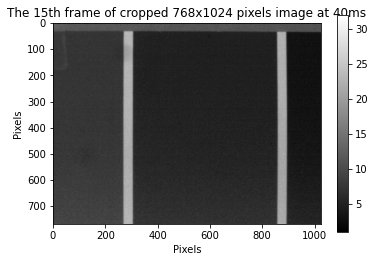

In [ ]:
plt.imshow(x4[3,15,:,:], cmap = 'gray')
plt.colorbar()
plt.title("The 15th frame of cropped 768x1024 pixels image at 40ms")
plt.xlabel("Pixels")
plt.ylabel("Pixels")

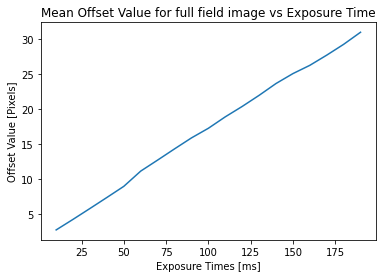

In [ ]:
plt.plot(exposure, offset4_vals)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Offset Value [Pixels]")
plt.title("Mean Offset Value for 768x1024 pixels image vs Exposure Time")
plt.savefig("MeanOffsetVsExposure_part1.png")

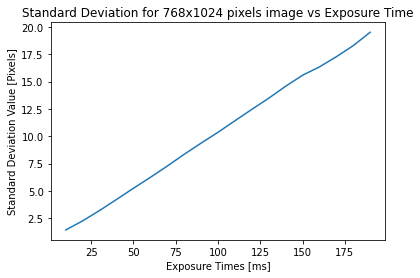

In [ ]:
plt.plot(exposure, stdev4_vals)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Standard Deviation Value [Pixels]")
plt.title("Standard Deviation for 768x1024 pixels image vs Exposure Time")
plt.savefig("Standard DeviationVsExposure_part1.png")

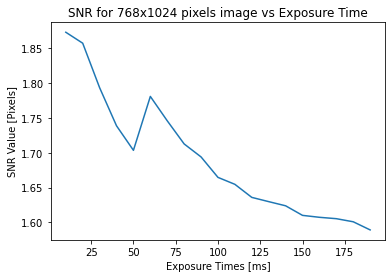

In [5]:
plt.plot(exposure, snr4)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("SNR Value [Pixels]")
plt.title("SNR for 768x1024 pixels image vs Exposure Time")
plt.savefig("SNRVsExposure_part1.png")

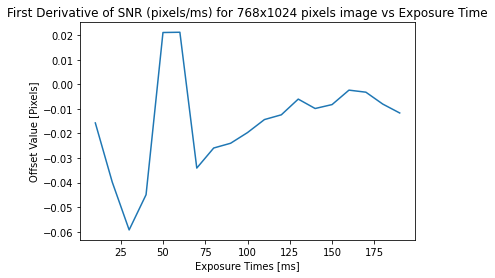

In [6]:
plt.plot(exposure, np.gradient(snr4))
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Offset Value [Pixels]")
plt.title("First Derivative of SNR (pixels/ms) for 768x1024 pixels image vs Exposure Time")
plt.savefig("Derivative_MeanOffsetVsExposure_part1.png")

In [21]:
gradient = np.gradient(snr4)
for i in range(len(gradient)):
  if 0.00 < gradient[i] < 0.03:
    print("The ideal exposure is appoximately at:", str(exposure[i]))
    break

print(gradient)

The ideal exposure is appoximately at: 50
[-0.01572105 -0.03977483 -0.05924135 -0.0449197   0.02106637  0.02117429
 -0.03407998 -0.02592136 -0.023986   -0.01964108 -0.01435232 -0.01241418
 -0.00602483 -0.0098507  -0.00825451 -0.00237843 -0.00321206 -0.00805459
 -0.01167073]


#### Live Video Feed for tuning focal length and aperture. 

In [ ]:
cam._get_AOI() # look at the Area of Interest. 

(0, 0, 1280, 1024)

In [ ]:
# set frame rate
cam.set_framerate(framerate = "10Hz")
# get exposure range, you can see that the frame rate will change the maximum exposure time. 
print(cam._get_exposure_range())
# print current frame rate
print(cam.framerate) 

(<Quantity(0.00898245614, 'millisecond')>, <Quantity(197.594526, 'millisecond')>)
5.05606735178449 hertz


In [ ]:
# to quit press live feed press "q"
cam.start_live_video()
while cam.is_open:
     
     frame = cam.grab_image(timeout='100s', copy=True)
     frame1 = np.stack((frame,) * 3,-1) #make frame as 1 channel image
     frame1 = frame1.astype(np.uint8)
     gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
     #now u can apply opencv features
     cv2.imshow('Camera', gray)
     if cv2.waitKey(30) & 0xFF == ord('q'):
        break
cam.stop_live_video()
cv2.destroyAllWindows()

5.05606735178449 hertz


In [ ]:
cam.close()

In [ ]:
del cam